<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, hessian

# **3.3.1. Necessary and sufficient conditions of local minimizers**

This section explains the conditions required to identify local minimizers in an unconstrained optimization problem. A point is a local minimizer if the function's gradient at that point is zero (first-order necessary condition). Additionally, for twice-differentiable functions, the Hessian matrix at the point must be positive semi-definite (second-order necessary condition), ensuring the function curves upwards locally. If both conditions are met, the point is either a local minimizer or a saddle point. The section also introduces descent directions, which are directions in which the function decreases locally.

This example demonstrates how to use the gradient and Hessian to find local minima in a simple quadratic function. We'll calculate the gradient and Hessian matrix to check if a given point is a local minimizer. The function used here is $f(x,y)=3x^2 +2y^2 +2xy$.

Gradient at (0, 0): [0, 0]
Hessian at (0, 0): 
Matrix([[6, 2], [2, 4]])


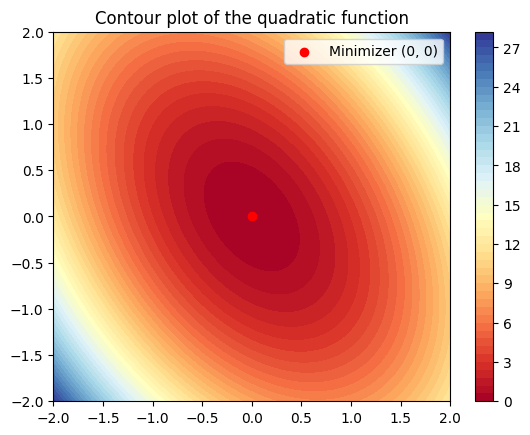

In [2]:
# Define the variables and function
x, y = symbols('x y')
f = 3*x**2 + 2*y**2 + 2*x*y

# Calculate the gradient
gradient_f = [diff(f, var) for var in (x, y)]

# Calculate the Hessian
hessian_f = hessian(f, (x, y))

# Evaluate the gradient and Hessian at the point (0, 0)
point = {x: 0, y: 0}
gradient_eval = [g.subs(point) for g in gradient_f]
hessian_eval = hessian_f.subs(point)

print(f"Gradient at (0, 0): {gradient_eval}")
print(f"Hessian at (0, 0): \n{hessian_eval}")

# Graph the quadratic surface for visualization
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = 3*X**2 + 2*Y**2 + 2*X*Y

plt.contourf(X, Y, Z, 50, cmap='RdYlBu')
plt.title('Contour plot of the quadratic function')
plt.colorbar()
plt.scatter(0, 0, color='red', label='Minimizer (0, 0)')
plt.legend()
plt.show()


# **3.3.2. Convexity and global minimizers**

A function is convex if the line segment between any two points on its graph lies above the graph itself. Convexity is crucial because, for convex functions, local minimizers are also global minimizers.  The convexity of a set and a function allows for easier optimization since the function doesn't have multiple local minima.

Convexity can be verified by the gradient and Hessian:
- If $f(y)≥f(x)+ \nabla f(x) \dot (y - x)$, then the function is convex.
- A function is convex if its Hessian is PSD.

This example shows how to verify the convexity of a function using its Hessian matrix and how to find the global minimizer for a convex function. We'll use a real-world cost function from machine learning, $f(w)=(w-3)^2 + 2$, which is convex.

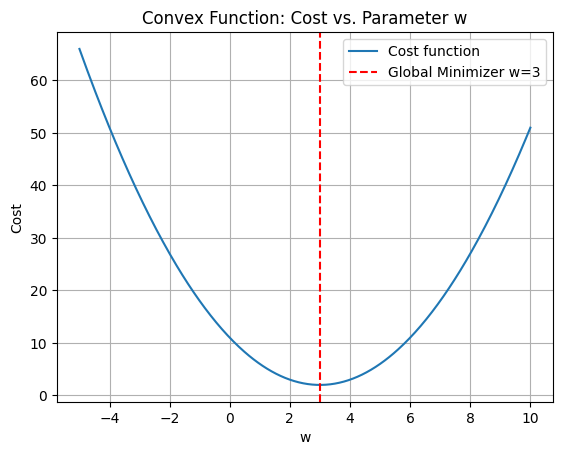

The second derivative is 2, confirming convexity.


In [3]:
# Define the function and its derivative
def f(w):
    return (w - 3)**2 + 2

def df(w):
    return 2 * (w - 3)

# Check convexity by plotting the function and verifying its shape
w = np.linspace(-5, 10, 400)
cost = f(w)

plt.plot(w, cost, label='Cost function')
plt.title('Convex Function: Cost vs. Parameter w')
plt.xlabel('w')
plt.ylabel('Cost')
plt.grid(True)
plt.axvline(x=3, color='r', linestyle='--', label='Global Minimizer w=3')
plt.legend()
plt.show()

# Confirm convexity using second derivative (Hessian is positive)
second_derivative = 2  # Constant positive value, confirming convexity
print(f"The second derivative is {second_derivative}, confirming convexity.")


# **3.3.3. Gradient descent**

Gradient descent is an iterative method for finding local minima by taking steps proportional to the negative of the gradient. The step size $\alpha_k$ controls the length of each step, and the algorithm updates the point as:
$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$.

The steepest descent method follows the gradient direction, ensuring the function value decreases in each iteration until it converges to a local minimum.

This example demonstrates the gradient descent algorithm to minimize a cost function. We'll use a simple univariate quadratic function $f(x)=(x-2)^2 +1$ to find its minimum using gradient descent, and visualize the convergence.

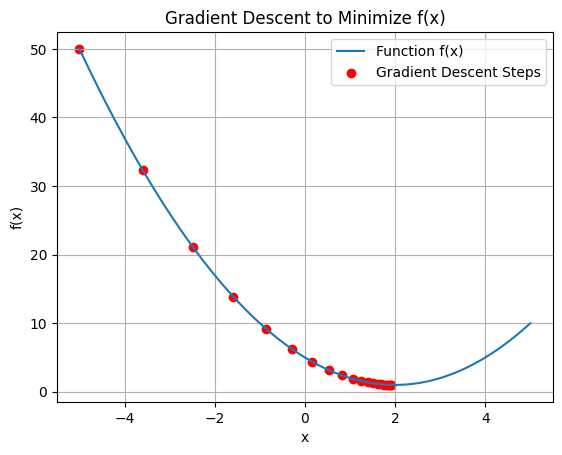

The function reaches a minimum at x = 1.9193


In [4]:
# Define the function and its derivative
def f(x):
    return (x - 2)**2 + 1

def df(x):
    return 2 * (x - 2)

# Gradient descent implementation
def gradient_descent(learning_rate, epochs, start_point):
    x = start_point
    x_history = [x]
    for _ in range(epochs):
        x -= learning_rate * df(x)
        x_history.append(x)
    return x, x_history

# Run gradient descent
start_point = -5
learning_rate = 0.1
epochs = 20
min_x, x_hist = gradient_descent(learning_rate, epochs, start_point)

# Plot the results
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='Function f(x)')
plt.scatter(x_hist, [f(x) for x in x_hist], color='red', label='Gradient Descent Steps')
plt.title('Gradient Descent to Minimize f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

print(f"The function reaches a minimum at x = {min_x:.4f}")
